In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import numpy as np

import mne

In [2]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [3]:
standard_1020_montage = mne.channels.make_standard_montage("standard_1020")
print(standard_1020_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


In [ ]:
standard_1020_montage.plot()  # 2D
fig = standard_1020_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [5]:
# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

In [6]:
# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2, c=c, linestyle=style, alpha=alpha,zorder=2)
            
    # vline = ['Fz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']
    vline = ['Fz', 'Cz', 'Pz']
    hline = ['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8']
    circle_line = ['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7']
    circle_line2 = ['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7']
    hline_p = ['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8']
    hline_cp = ['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8']
    hline_po = ['PO7', 'PO3', 'POz', 'PO4', 'PO8']
    hline_f = ['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8']
    hline_ft = ['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8']
    hline_af = ['AF7', 'AF3', 'AFz', 'AF4', 'AF8']

    plot_line(vline, alpha=alpha, c='mediumpurple')
    plot_line(hline, alpha=alpha, c='seagreen')
    plot_line(circle_line, alpha=alpha)
    plot_line(circle_line2, alpha=alpha)
    plot_line(hline_p, style='--', alpha=0.5 * alpha)
    plot_line(hline_f, style='--', alpha=0.5 * alpha)
    plot_line(hline_cp, style='--', alpha=0.5 * alpha)
    plot_line(hline_po, style='--', alpha=0.5 * alpha)
    plot_line(hline_ft, style='--', alpha=0.5 * alpha)
    plot_line(hline_af, style='--', alpha=0.5 * alpha)

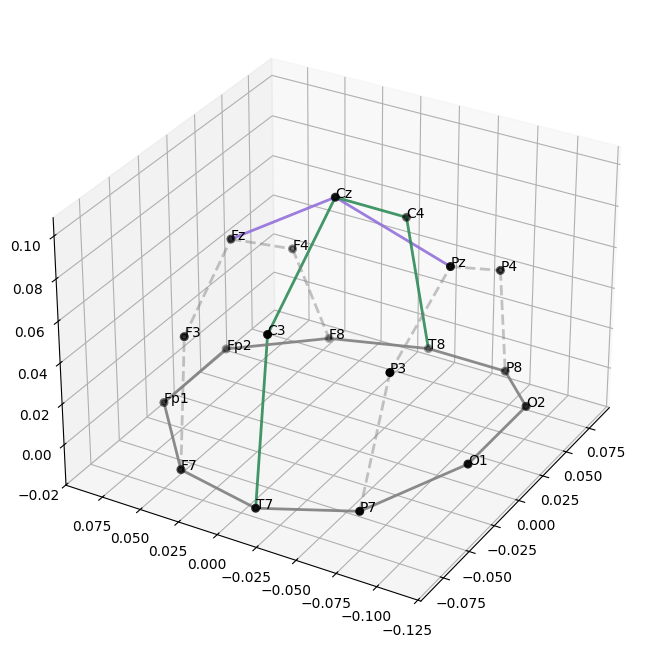

In [7]:

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = selected_montage.plot(kind="3d", show=False)  # 3D plot

# Set view angle
ax = fig.gca()
ax.set_zorder(1)
ax.view_init(azim=210, elev=30)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=0.9)

# Show the plot
plt.show()

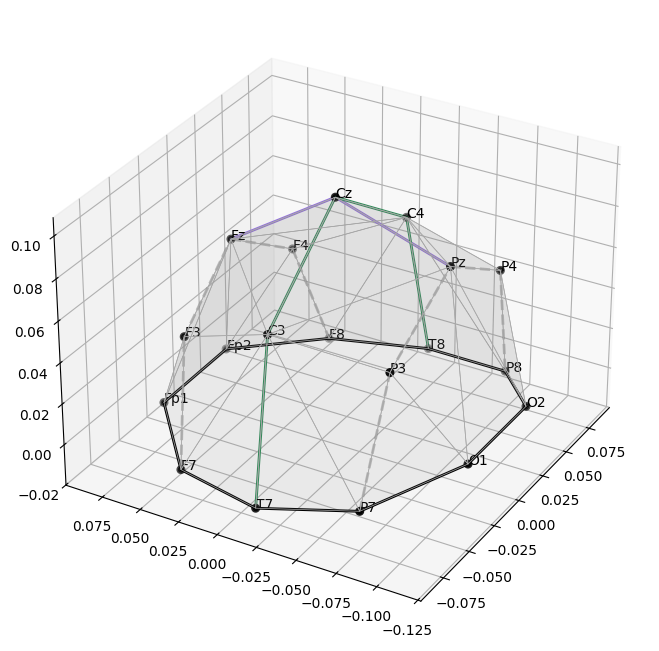

In [15]:
import matplotlib.pyplot as plt
import mne
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2, c=c, linestyle=style, alpha=alpha)

    # Define your Poly3DCollection
    ax.add_collection(Poly3DCollection([
        [pos_dict['O1'], pos_dict['O2'], pos_dict['Pz']], 
        [pos_dict['P7'], pos_dict['O1'], pos_dict['P3']], 
        [pos_dict['O1'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['P8'], pos_dict['O2'], pos_dict['P4']], 
        [pos_dict['O2'], pos_dict['P4'], pos_dict['Pz']],
        [pos_dict['T7'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['P3'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['C3'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T8'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['P4'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['P4'], pos_dict['Pz']], 
        [pos_dict['C4'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T7'], pos_dict['F7'], pos_dict['C3']], 
        [pos_dict['F7'], pos_dict['F3'], pos_dict['C3']], 
        [pos_dict['F3'], pos_dict['Fz'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['T8'], pos_dict['F8'], pos_dict['C4']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['C4']], 
        [pos_dict['F4'], pos_dict['Fz'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['F7'], pos_dict['F3'], pos_dict['Fp1']], 
        [pos_dict['F3'], pos_dict['Fp1'], pos_dict['Fz']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['Fp2']], 
        [pos_dict['F4'], pos_dict['Fp2'], pos_dict['Fz']], 
        [pos_dict['Fp1'], pos_dict['Fz'], pos_dict['Fp2']],
    ], 
    facecolors='grey', edgecolors='darkgrey', linewidths=0.5, alpha=0.1))

    plot_line(['Fz', 'Cz', 'Pz'], alpha=alpha, c='mediumpurple')
    plot_line(['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8'], alpha=alpha, c='seagreen')
    plot_line(['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7'], alpha=alpha, c='black')
    plot_line(['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7'], alpha=alpha, c='black')
    plot_line(['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8'], style='--', alpha=0.5 * alpha)
    plot_line(['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8'], style='--', alpha=0.5 * alpha)
    plot_line(['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8'], style='--', alpha=0.5 * alpha)
    plot_line(['PO7', 'PO3', 'POz', 'PO4', 'PO8'], style='--', alpha=0.5 * alpha)
    plot_line(['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8'], style='--', alpha=0.5 * alpha)
    plot_line(['AF7', 'AF3', 'AFz', 'AF4', 'AF8'], style='--', alpha=0.5 * alpha)

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = selected_montage.plot(kind="3d", show=False)  # 3D plot

# Set view angle
ax = fig.gca()
ax.view_init(azim=210, elev=30)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=1)

# Show the plot
plt.show()

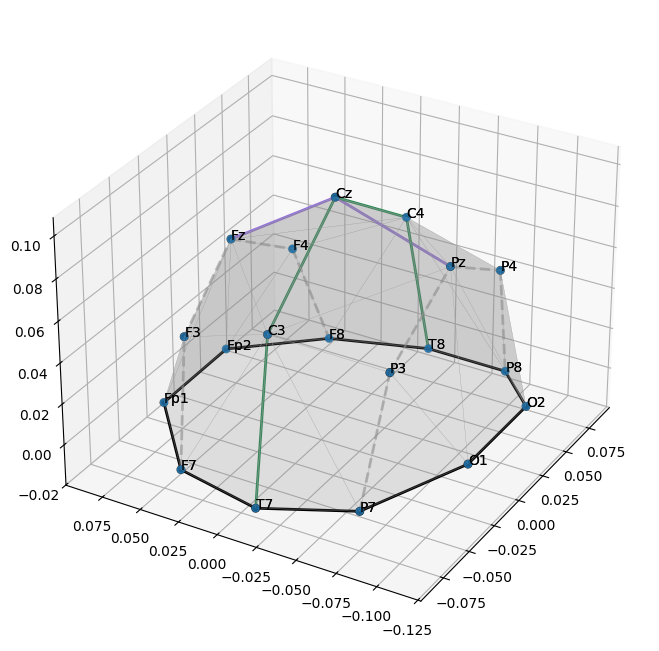

In [66]:
import matplotlib.pyplot as plt
import mne
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2, c=c, linestyle=style, alpha=alpha)

    plot_line(['Fz', 'Cz', 'Pz'], alpha=alpha, c='mediumpurple')
    plot_line(['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8'], alpha=alpha, c='seagreen')
    plot_line(['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7'], alpha=alpha, c='black')
    plot_line(['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7'], alpha=alpha, c='black')
    plot_line(['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8'], style='--', alpha=0.5 * alpha)
    plot_line(['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8'], style='--', alpha=0.5 * alpha)
    plot_line(['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8'], style='--', alpha=0.5 * alpha)
    plot_line(['PO7', 'PO3', 'POz', 'PO4', 'PO8'], style='--', alpha=0.5 * alpha)
    plot_line(['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8'], style='--', alpha=0.5 * alpha)
    plot_line(['AF7', 'AF3', 'AFz', 'AF4', 'AF8'], style='--', alpha=0.5 * alpha)

    # Plot the Poly3DCollection (montage) at last
    ax.add_collection(Poly3DCollection([
        [pos_dict['O1'], pos_dict['O2'], pos_dict['Pz']], 
        [pos_dict['P7'], pos_dict['O1'], pos_dict['P3']], 
        [pos_dict['O1'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['P8'], pos_dict['O2'], pos_dict['P4']], 
        [pos_dict['O2'], pos_dict['P4'], pos_dict['Pz']],
        [pos_dict['T7'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['P3'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['C3'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T8'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['P4'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['P4'], pos_dict['Pz']], 
        [pos_dict['C4'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T7'], pos_dict['F7'], pos_dict['C3']], 
        [pos_dict['F7'], pos_dict['F3'], pos_dict['C3']], 
        [pos_dict['F3'], pos_dict['Fz'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['T8'], pos_dict['F8'], pos_dict['C4']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['C4']], 
        [pos_dict['F4'], pos_dict['Fz'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['F7'], pos_dict['F3'], pos_dict['Fp1']], 
        [pos_dict['F3'], pos_dict['Fp1'], pos_dict['Fz']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['Fp2']], 
        [pos_dict['F4'], pos_dict['Fp2'], pos_dict['Fz']], 
        [pos_dict['Fp1'], pos_dict['Fz'], pos_dict['Fp2']],
    ], 
    facecolors='grey', edgecolors='darkgrey', linewidths=0.15, alpha=0.2))

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = selected_montage.plot(kind="3d", show=False)  # 3D plot

# Set view angle
ax = fig.gca()
ax.view_init(azim=210, elev=30)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# ax.get_zaxis().set_ticks([])

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=1)

positions = np.array([selected_pos[ch] for ch in selected_channels])
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='tab:blue', s=25, alpha=0.75)
for i, txt in enumerate(selected_channels):
    # print(i, txt)
    # ax.annotate(txt, (positions[i, 0], positions[i, 1], positions[i, 2]))
    ax.text(positions[i, 0], positions[i, 1], positions[i, 2], txt, zorder=10)

# Show the plot
plt.show()


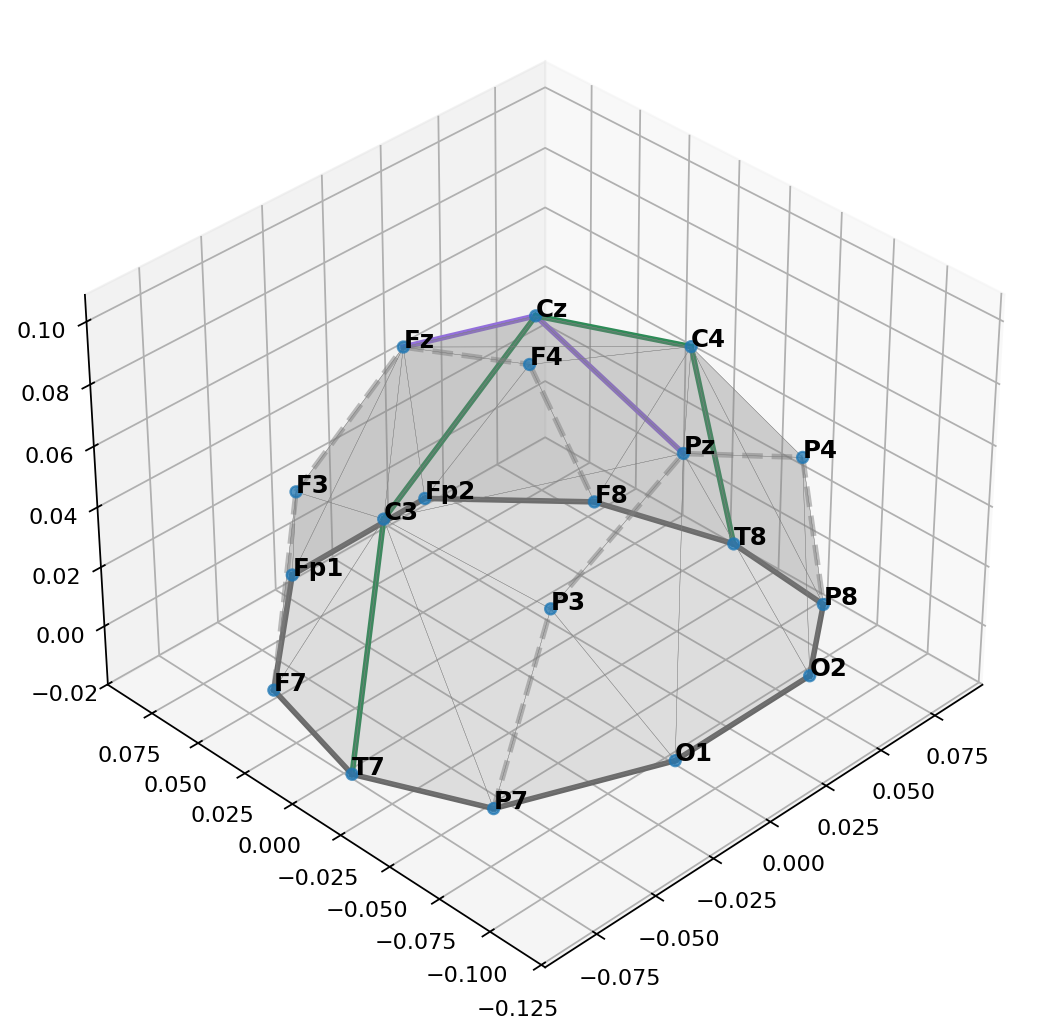

In [2]:
import matplotlib.pyplot as plt
import mne
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2.5, c=c, linestyle=style, alpha=alpha)

    plot_line(['Fz', 'Cz', 'Pz'], alpha=alpha, c='mediumpurple')
    plot_line(['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8'], alpha=alpha, c='seagreen')
    plot_line(['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7'], alpha=alpha, c='dimgrey')
    plot_line(['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7'], alpha=alpha, c='dimgrey')
    plot_line(['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8'], style='--', alpha=0.5 * alpha)
    plot_line(['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8'], style='--', alpha=0.5 * alpha)
    plot_line(['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8'], style='--', alpha=0.5 * alpha)
    plot_line(['PO7', 'PO3', 'POz', 'PO4', 'PO8'], style='--', alpha=0.5 * alpha)
    plot_line(['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8'], style='--', alpha=0.5 * alpha)
    plot_line(['AF7', 'AF3', 'AFz', 'AF4', 'AF8'], style='--', alpha=0.5 * alpha)

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = plt.figure(figsize=(12, 8), dpi=160)
ax = fig.add_subplot(111, projection='3d')

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=1)

# Plot the Poly3DCollection (montage) at last
ax.add_collection(Poly3DCollection([
    [selected_pos['O1'], selected_pos['O2'], selected_pos['Pz']], 
    [selected_pos['P7'], selected_pos['O1'], selected_pos['P3']], 
    [selected_pos['O1'], selected_pos['P3'], selected_pos['Pz']], 
    [selected_pos['P8'], selected_pos['O2'], selected_pos['P4']], 
    [selected_pos['O2'], selected_pos['P4'], selected_pos['Pz']],
    [selected_pos['T7'], selected_pos['P7'], selected_pos['C3']], 
    [selected_pos['P3'], selected_pos['P7'], selected_pos['C3']], 
    [selected_pos['C3'], selected_pos['P3'], selected_pos['Pz']], 
    [selected_pos['C3'], selected_pos['Pz'], selected_pos['Cz']],
    [selected_pos['T8'], selected_pos['P8'], selected_pos['C4']], 
    [selected_pos['P4'], selected_pos['P8'], selected_pos['C4']], 
    [selected_pos['C4'], selected_pos['P4'], selected_pos['Pz']], 
    [selected_pos['C4'], selected_pos['Pz'], selected_pos['Cz']],
    [selected_pos['T7'], selected_pos['F7'], selected_pos['C3']], 
    [selected_pos['F7'], selected_pos['F3'], selected_pos['C3']], 
    [selected_pos['F3'], selected_pos['Fz'], selected_pos['C3']], 
    [selected_pos['C3'], selected_pos['Cz'], selected_pos['Fz']],
    [selected_pos['T8'], selected_pos['F8'], selected_pos['C4']], 
    [selected_pos['F8'], selected_pos['F4'], selected_pos['C4']], 
    [selected_pos['F4'], selected_pos['Fz'], selected_pos['C4']], 
    [selected_pos['C4'], selected_pos['Cz'], selected_pos['Fz']],
    [selected_pos['F7'], selected_pos['F3'], selected_pos['Fp1']], 
    [selected_pos['F3'], selected_pos['Fp1'], selected_pos['Fz']], 
    [selected_pos['F8'], selected_pos['F4'], selected_pos['Fp2']], 
    [selected_pos['F4'], selected_pos['Fp2'], selected_pos['Fz']], 
    [selected_pos['Fp1'], selected_pos['Fz'], selected_pos['Fp2']],
], 
facecolors='grey', edgecolors='grey', linewidths=0.15, alpha=0.2))

positions = np.array([selected_pos[ch] for ch in selected_channels])
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='tab:blue', s=25, alpha=0.75)
for i, txt in enumerate(selected_channels):
    # print(i, txt)
    # ax.annotate(txt, (positions[i, 0], positions[i, 1], positions[i, 2]))
    ax.text(positions[i, 0], positions[i, 1], positions[i, 2], txt, zorder=10, fontsize=11, fontweight='bold')

# Set view angle
ax.view_init(azim=225, elev=35)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Show the plot
plt.show()


In [1]:
import os

import torch
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

import mne

In [2]:
fontsize = 16
markersize = 7

root = "/home/oturgut/Documents/Paper/NeurIPS2024/Figures/scripts"

def load_eeg_pretrain(model: str = 'base'):
    eeg_channel_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 
                         'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']
    y, X = torch.load(os.path.join(root, f'./{model}Deep_pos_embed_y.pt'))
    X = X[1:]
    eeg_index = y['eeg_10-20']
    X = X[eeg_index:eeg_index+19].numpy()

    return X, eeg_channel_names

def load_eeg_finetune(multi: bool = False):
    eeg_channel_names = ['F3', 'F4', 'FC5', 'C3', 'C4', 'CP5', 'P3', 'Pz', 'P4', 'P8', 'Oz', 
                         'O2', 'AF3', 'AF4', 'F1', 'F2', 'FT7', 'C5', 'C1', 'C2', 'C6', 'CP3', 
                         'CPz', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO3', 'POz', 'PO4', 'PO8']
    multi_name = 'multi' if multi else 'single'
    y, X = torch.load(os.path.join(root, f'./baseDeep_{multi_name}_pos_embed_y.pt'))
    X = X[1:].numpy()  # remove pad token

    return X, eeg_channel_names


def channel_dict(X, channel_names):
    return {name: X[i] for i, name in enumerate(channel_names)}


def project_to_channels(X, channel_names, is_3d=True):
    montages = mne.channels.make_standard_montage('standard_1020')
    pos_dict = montages.get_positions()['ch_pos']
    gt_pos = np.stack([pos_dict[channel] for channel in channel_names])

    pca = PCA(n_components=3 if is_3d else 2)
    components = pca.fit_transform(X)
    print('expl variance:', pca.explained_variance_ratio_)
    lr = LinearRegression(fit_intercept=True)
    lr.fit(components, gt_pos)
    positions = lr.predict(components)
    r2 = lr.score(components, gt_pos)
    print('R^2:', r2)
    return positions, gt_pos, r2


def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.add_line(Line2D([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], 
                            lw=2, c=c, linestyle=style, alpha=alpha))
            
    vline = ['Fz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']
    hline = ['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8']
    circle_line = ['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7']
    circle_line2 = ['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7']
    hline_p = ['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8']
    hline_cp = ['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8']
    hline_po = ['PO7', 'PO3', 'POz', 'PO4', 'PO8']
    hline_f = ['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8']
    hline_ft = ['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8']
    hline_af = ['AF7', 'AF3', 'AFz', 'AF4', 'AF8']

    plot_line(vline, alpha=alpha)
    plot_line(hline, alpha=alpha)
    plot_line(circle_line, alpha=alpha)
    plot_line(circle_line2, alpha=alpha)
    plot_line(hline_p, style='--', alpha=0.7 * alpha)
    plot_line(hline_f, style='--', alpha=0.7 * alpha)
    plot_line(hline_cp, style='--', alpha=0.7 * alpha)
    plot_line(hline_po, style='--', alpha=0.7 * alpha)
    plot_line(hline_ft, style='--', alpha=0.7 * alpha)
    plot_line(hline_af, style='--', alpha=0.7 * alpha)
    

def plot_gt_points(ax, gt_pos_list, channel_names_list, annotate=True):
    allpos_dict = {}
    for gt_pos, channel_names in zip(gt_pos_list, channel_names_list):
        allpos_dict.update(channel_dict(gt_pos, channel_names))

    all_pos = np.stack(list(allpos_dict.values()))

    ax.plot(all_pos[:, 0], all_pos[:, 1], 'o', c='tab:grey', alpha=0.35, label="true", fillstyle="none", markersize=markersize)
    if annotate:
        for i, txt in enumerate(allpos_dict.keys()):
            ax.annotate(txt, (all_pos[i, 0] + 0.002, all_pos[i, 1] - 0.0012), c='tab:grey', alpha=0.5, fontsize=fontsize)

    plot_gridlines(ax, allpos_dict, 'tab:grey', alpha=0.35)


def plot_points_with_offset(ax, pos, gt_pos, channel_names, c, arrows=True, lines=True, y_offset=0.0):
    ax.plot(pos[:, 0], pos[:, 1], 'o', c=c, alpha=0.75, label="learned", fillstyle="full", markersize=markersize)

    for p, gt_p, ch in zip(pos, gt_pos, channel_names):
        offset = gt_p - p
        ax.annotate(ch, (p[0] + 0.002, p[1] + y_offset), c=c, fontsize=fontsize, fontweight='bold')
        if arrows:
            ax.arrow(p[0], p[1], offset[0], offset[1], 
                linestyle='dashed', linewidth=0.05,
                length_includes_head=True, facecolor=c, edgecolor=c)
    if lines:
        plot_gridlines(ax, channel_dict(pos, channel_names), c, alpha=0.35)


def plot_relative_offsets(ax, pos_1, pos_2, channels1, channels2, c):
    union_channels = list(set(channels1) & set(channels2))
    pos_1 = np.stack([pos_1[channels1.index(channel)] for channel in union_channels])
    pos_2 = np.stack([pos_2[channels2.index(channel)] for channel in union_channels])

    for p1, p2 in zip(pos_1, pos_2):
        ax.add_line(Line2D([p1[0], p2[0]], [p1[1], p2[1]], lw=2, c=c, linestyle='dashed', alpha=0.5))


X_eeg_1, eeg_channel_names_1 = load_eeg_pretrain('base')
pos_1, gt_pos_1, r2_1 = project_to_channels(X_eeg_1, eeg_channel_names_1, is_3d=True)

X_eeg_2, eeg_channel_names_2 = load_eeg_finetune(multi=True)
pos_2, gt_pos_2, r2_2 = project_to_channels(X_eeg_2, eeg_channel_names_2, is_3d=True)

expl variance: [0.32905823 0.25031048 0.16752346]
R^2: 0.8077183045789167
expl variance: [0.3919073  0.32972088 0.1570388 ]
R^2: 0.949359339781568


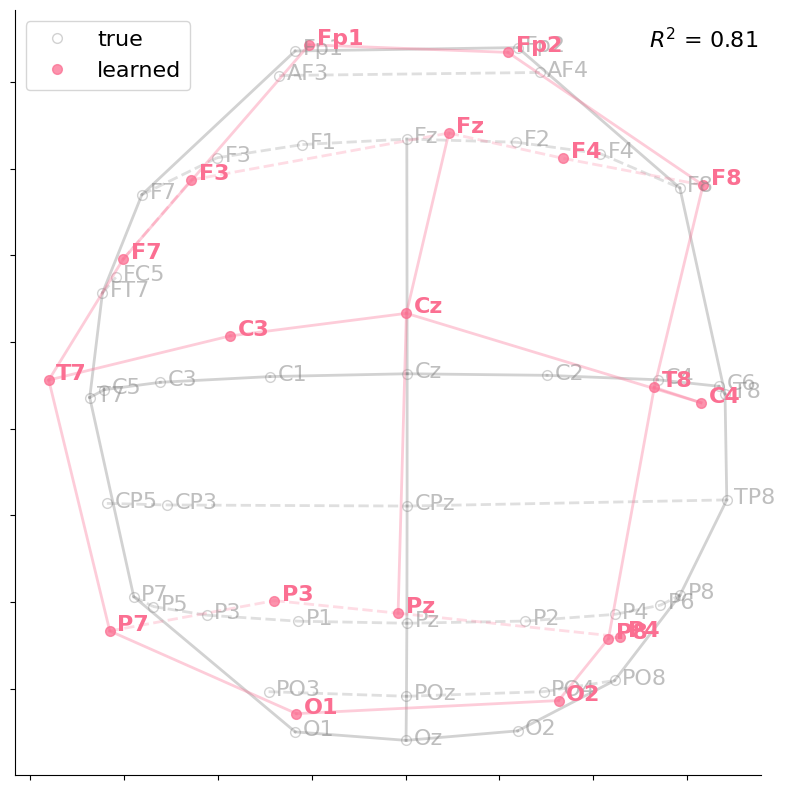

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

plot_gt_points(axs, [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs, pos_1, gt_pos_1, eeg_channel_names_1, '#fb6f92', arrows=False)
axs.text(0.85, 0.95, r'${R^2}$ = ' + f'{r2_1:.2f}', transform=axs.transAxes, fontsize=16)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
# axs.spines['left'].set_visible(False)
# axs.spines['bottom'].set_visible(False)
axs.legend(loc='upper left', fontsize=16)
axs.set_xticklabels([])
axs.set_yticklabels([])

fig.tight_layout()
# plt.savefig('../figures/eeg_coords_2D_pretraining.pdf')
plt.show()

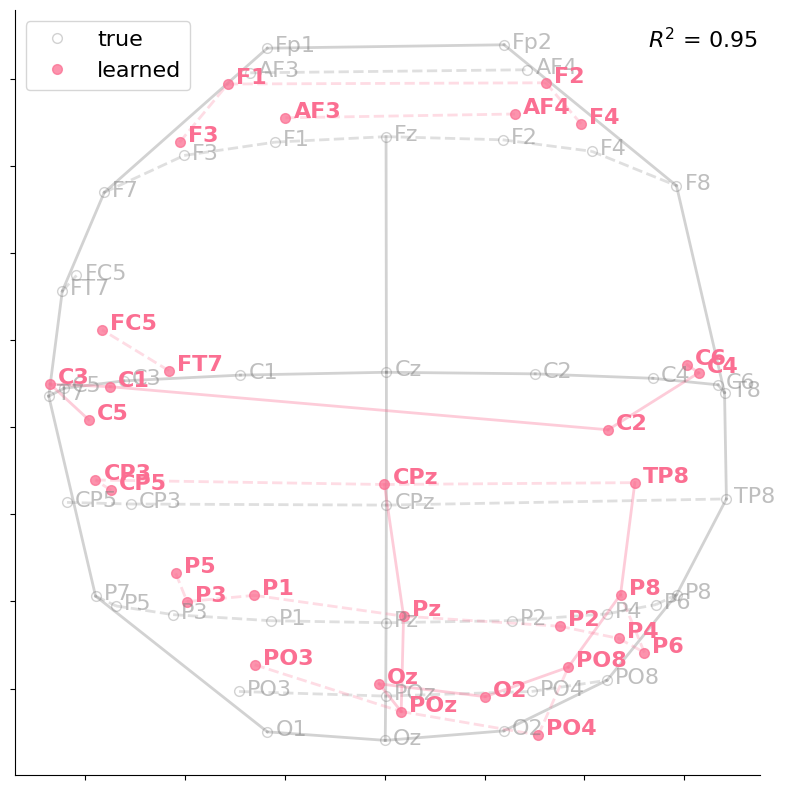

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

plot_gt_points(axs, [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs, pos_2, gt_pos_2, eeg_channel_names_2, '#fb6f92', arrows=False)
axs.text(0.85, 0.95, r'${R^2}$ = ' + f'{r2_2:.2f}', transform=axs.transAxes, fontsize=16)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
# axs.spines['left'].set_visible(False)
# axs.spines['bottom'].set_visible(False)
axs.legend(loc='upper left', fontsize=16)
axs.set_xticklabels([])
axs.set_yticklabels([])

fig.tight_layout()
# plt.savefig('../figures/eeg_coords_2D_finetuning.pdf')
plt.show()

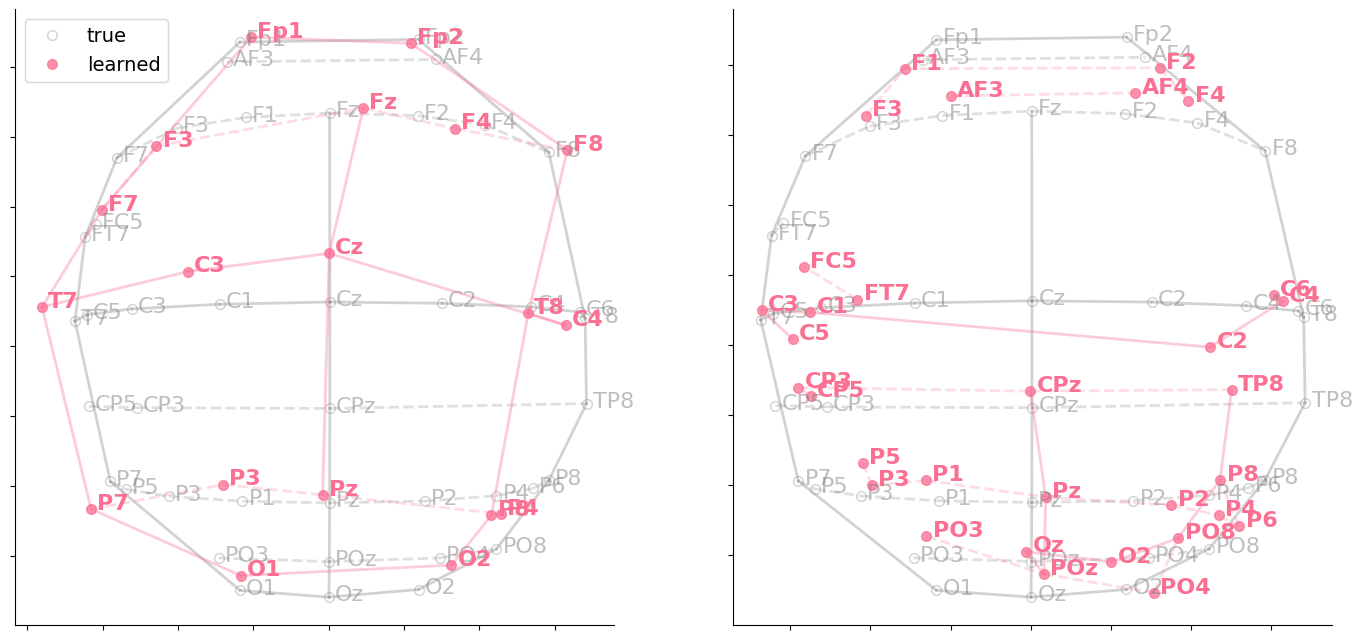

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(17, 8))

plot_gt_points(axs[0], [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs[0], pos_1, gt_pos_1, eeg_channel_names_1, '#fb6f92', arrows=False)
# axs[0].text(0.05, 0.93, r'$\mathbf{R^2}$ = ' + f'{r2_1:.2f}', transform=axs[0].transAxes, fontsize=16, fontweight='bold')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
# axs[0].spines['left'].set_visible(False)
# axs[0].spines['bottom'].set_visible(False)
axs[0].legend(loc='upper left', fontsize=14)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])


plot_gt_points(axs[1], [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs[1], pos_2, gt_pos_2, eeg_channel_names_2, '#fb6f92', arrows=False)
# axs[1].text(0.05, 0.93, r'$\mathbf{R^2}$ = ' + f'{r2_2:.2f}', transform=axs[1].transAxes, fontsize=16, fontweight='bold')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
# axs[1].spines['left'].set_visible(False)
# axs[1].spines['bottom'].set_visible(False)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])


# fig.tight_layout()
# plt.savefig('../figures/eeg_coords_2d.pdf')
plt.show()